In [61]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

In [62]:
# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
from credentials import *

$/sqrt(2+x)$

_italic_

In [64]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="lisarobinkelly", count=300)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

Lisa is being laid to rest today.  This is a clip she uploaded herself to youtube awhile back and was very proud... http://t.co/SmqLCjYCge

From Lisa's Aunt Kate: 

"Dear Friends of Lisa,
Lisa's funeral is on Thursday, September 5th in Charlotte, N.C.... http://t.co/5GLjSR1WCB

Hi everyone, this post right now is obviously not from Lisa, but rather I'm good friend who has collaborated with... http://t.co/aL2rm9z4wG

go "like" my friends restaurant page please... https://t.co/lKhn8Fb3Du http://t.co/eerFItRM7q

Tonight, dinner at Mr Souvla.... I need me some Greek.... !! xoxox



In [65]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
#data = data.drop(data.index[[0,1,2]]) #removing last 3 tweets posted by her friend
#data = data.reset_index()

# We display the first 10 elements of the dataframe:
display(data.tail(10))

,Tweets
190,@LisaRobin357
191,C'mon boston RED SOX NATION!!!
192,@BurkhartHyde.
193,@DENISE_RICHARDS
194,@EMILIOTHEWAY E. Peace and love. Xo
195,"To walk away from love hurts.......,this time ..."
196,MISS CALIE!!!!
197,Movin today. Everyday in everyway life is gett...
198,@EMILIOTHEWAY facebook me!!!
199,Listening to music and just chillin.


In [66]:
# Internal methods of a single tweet object:
print(dir(tweets[1]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [67]:
# We print info from the first tweet:
print(tweets[1].id)
print(tweets[1].created_at)
print(tweets[1].source)
print(tweets[1].favorite_count)
print(tweets[1].retweet_count)
print(tweets[1].geo)
print(tweets[1].coordinates)
print(tweets[1].entities)

373278417724391424
2013-08-30 02:58:04
Facebook
1
4
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'http://t.co/5GLjSR1WCB', 'expanded_url': 'http://fb.me/2lJeB4gd6', 'display_url': 'fb.me/2lJeB4gd6', 'indices': [115, 137]}]}


In [68]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [69]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,Lisa is being laid to rest today. This is a c...,138,375630003205337088,2013-09-05 14:42:26,Facebook,16,9
1,"From Lisa's Aunt Kate: \n\n""Dear Friends of Li...",137,373278417724391424,2013-08-30 02:58:04,Facebook,1,4
2,"Hi everyone, this post right now is obviously ...",139,368127944746483714,2013-08-15 21:51:56,Facebook,19,23
3,"go ""like"" my friends restaurant page please......",93,350035042921218048,2013-06-26 23:37:12,Facebook,2,1
4,"Tonight, dinner at Mr Souvla.... I need me som...",66,350033449148616704,2013-06-26 23:30:52,Facebook,1,0
5,Bikram Yoga anyone???,21,349908742705389569,2013-06-26 15:15:19,Facebook,0,0
6,Spent the day walking the beach in sunny Calif...,105,349735692399677440,2013-06-26 03:47:41,Facebook,2,3
7,"I am having a great day............,free at la...",110,348955877665021953,2013-06-24 00:08:59,Facebook,11,6
8,Morning! — feeling happy,24,348081811282358274,2013-06-21 14:15:45,Facebook,2,0
9,Root for the underdog. We have a heart and so...,70,346830769974562816,2013-06-18 03:24:34,Facebook,2,8


In [70]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 55.29


In [71]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Hi everyone, this post right now is obviously not from Lisa, but rather I'm good friend who has collaborated with... http://t.co/aL2rm9z4wG
Number of likes: 19
139 characters.

The tweet with more retweets is: 
RT @DalaiLama: We should value our enemies because they provide us with unique opportunities to practice patience, tolerance and forbear ...
Number of retweets: 9061
140 characters.



In [72]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

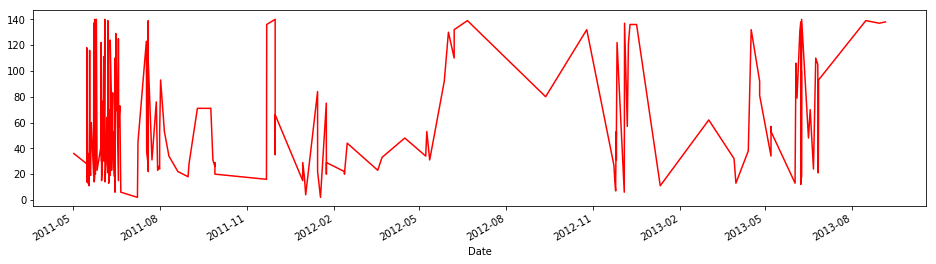

In [73]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

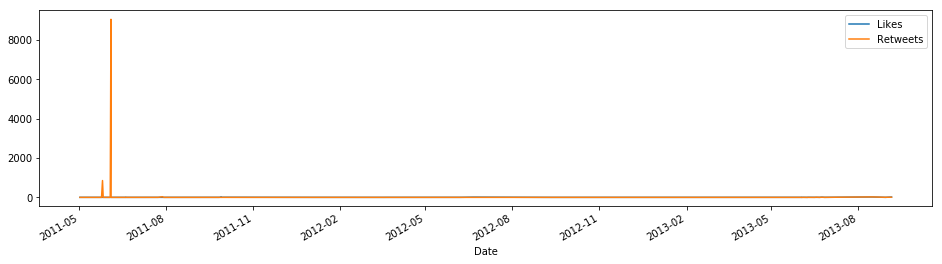

In [74]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [75]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Facebook
* Twitter Web Client
* Twitter for Websites
* Twitter for Android
* DROID
* Mobile Web


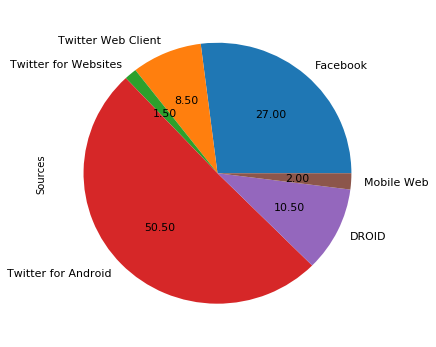

In [76]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [77]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [78]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Lisa is being laid to rest today. This is a c...,138,375630003205337088,2013-09-05 14:42:26,Facebook,16,9,1
1,"From Lisa's Aunt Kate: \n\n""Dear Friends of Li...",137,373278417724391424,2013-08-30 02:58:04,Facebook,1,4,0
2,"Hi everyone, this post right now is obviously ...",139,368127944746483714,2013-08-15 21:51:56,Facebook,19,23,1
3,"go ""like"" my friends restaurant page please......",93,350035042921218048,2013-06-26 23:37:12,Facebook,2,1,0
4,"Tonight, dinner at Mr Souvla.... I need me som...",66,350033449148616704,2013-06-26 23:30:52,Facebook,1,0,0
5,Bikram Yoga anyone???,21,349908742705389569,2013-06-26 15:15:19,Facebook,0,0,0
6,Spent the day walking the beach in sunny Calif...,105,349735692399677440,2013-06-26 03:47:41,Facebook,2,3,1
7,"I am having a great day............,free at la...",110,348955877665021953,2013-06-24 00:08:59,Facebook,11,6,1
8,Morning! — feeling happy,24,348081811282358274,2013-06-21 14:15:45,Facebook,2,0,1
9,Root for the underdog. We have a heart and so...,70,346830769974562816,2013-06-18 03:24:34,Facebook,2,8,0


In [79]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [80]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 47.0%
Percentage of neutral tweets: 46.5%
Percentage de negative tweets: 6.5%
